### Random Forest classifier

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import joblib

from team_code import load_model

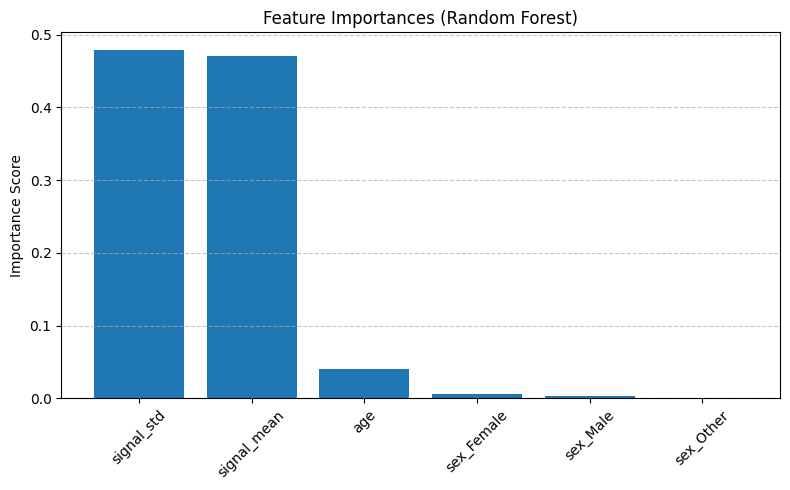

In [7]:
model = load_model("model", True)

feature_names = ['age', 'sex_Female', 'sex_Male', 'sex_Other', 'signal_mean', 'signal_std']

importances = model['model'].feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Random Forest Feature Extracter

In [8]:
from helper_code import *

In [17]:
def extract_features(record):
    header = load_header(record)
    age = get_age(header)
    sex = get_sex(header)

    one_hot_encoding_sex = np.zeros(3, dtype=bool)
    if sex == 'Female':
        one_hot_encoding_sex[0] = 1
    elif sex == 'Male':
        one_hot_encoding_sex[1] = 1
    else:
        one_hot_encoding_sex[2] = 1

    signal, fields = load_signals(record)
    print(fields['sig_name'])

    # TO-DO: Update to compute per-lead features. Check lead order and update and use functions for reordering leads as needed.

    n_leads = signal.shape[1]
    lead_means = []
    lead_stds = []

    for i in range(n_leads):
        lead = signal[:, i]
        finite_lead = lead[np.isfinite(lead)]
        if finite_lead.size > 0:
            lead_means.append(np.nanmean(finite_lead))
            lead_stds.append(np.nanstd(finite_lead))
        else:
            lead_means.append(0.0)
            lead_stds.append(0.0)

    features = np.concatenate(([age], one_hot_encoding_sex, lead_means, lead_stds))
    print(lead_means)

    return np.asarray(features, dtype=np.float32)

In [18]:
record = "data/samitrop_output/4991"
features = extract_features(record)

['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
[np.float64(0.005342876618950238), np.float64(0.005321063394683028), np.float64(-1.0906612133604798e-05), np.float64(-0.0005354464894342207), np.float64(0.005025221540558963), np.float64(0.00510259032038173), np.float64(-0.002704839809134287), np.float64(0.001579413769597821), np.float64(0.0013207225630538502), np.float64(0.002471710974778464), np.float64(0.002028289025221542), np.float64(0.0024403544648943336)]


In [14]:
features

array([ 8.5000000e+01,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        5.3428765e-03,  5.3210636e-03, -1.0906612e-05, -5.3544651e-04,
        5.0252215e-03,  5.1025902e-03, -2.7048399e-03,  1.5794138e-03,
        1.3207225e-03,  2.4717110e-03,  2.0282890e-03,  2.4403546e-03,
        2.5360864e-01,  2.4348117e-01,  6.5309487e-02,  2.4648246e-01,
        1.3950662e-01,  1.2532571e-01,  3.3917147e-01,  2.8043965e-01,
        3.1922716e-01,  5.7278800e-01,  5.9181005e-01,  5.0415826e-01],
      dtype=float32)

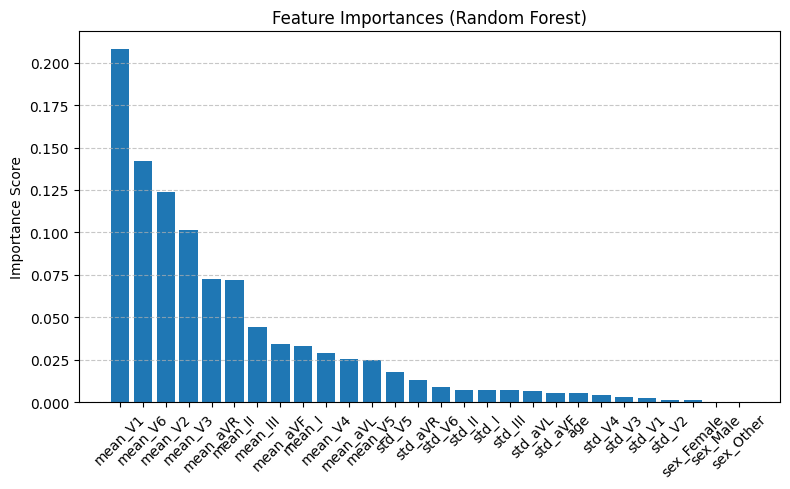

In [27]:
model_filename = "model/model_RF_28.sav"
model = joblib.load(model_filename)

feature_names = [
    "age",
    "sex_Female", "sex_Male", "sex_Other",
    
    "mean_I", "mean_II", "mean_III", "mean_aVR", "mean_aVL", "mean_aVF",
    "mean_V1", "mean_V2", "mean_V3", "mean_V4", "mean_V5", "mean_V6",
    
    "std_I", "std_II", "std_III", "std_aVR", "std_aVL", "std_aVF",
    "std_V1", "std_V2", "std_V3", "std_V4", "std_V5", "std_V6"
]

importances = model['model'].feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
importances

array([0.00510121, 0.00099176, 0.00027865, 0.        , 0.03280123,
       0.07217178, 0.0440601 , 0.07283258, 0.02535689, 0.03450886,
       0.20809703, 0.12364594, 0.10150271, 0.02877947, 0.02452107,
       0.14185851, 0.00707396, 0.00731181, 0.00690456, 0.01325602,
       0.00646255, 0.00535286, 0.00220733, 0.00141342, 0.0030468 ,
       0.003921  , 0.0178722 , 0.00866969])

### XGBoost

In [ ]:
# pip install xgboost

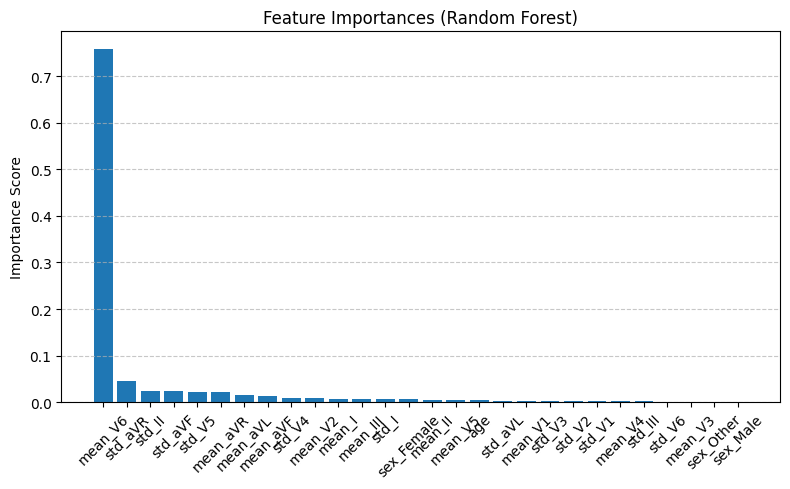

In [26]:
model_filename = "model/model_XG_28.sav"
model = joblib.load(model_filename)

feature_names = [
    "age",
    "sex_Female", "sex_Male", "sex_Other",
    
    "mean_I", "mean_II", "mean_III", "mean_aVR", "mean_aVL", "mean_aVF",
    "mean_V1", "mean_V2", "mean_V3", "mean_V4", "mean_V5", "mean_V6",
    
    "std_I", "std_II", "std_III", "std_aVR", "std_aVL", "std_aVF",
    "std_V1", "std_V2", "std_V3", "std_V4", "std_V5", "std_V6"
]

importances = model['model'].feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Grad_CAM

Predicted class index: 1, Probability: 0.9999


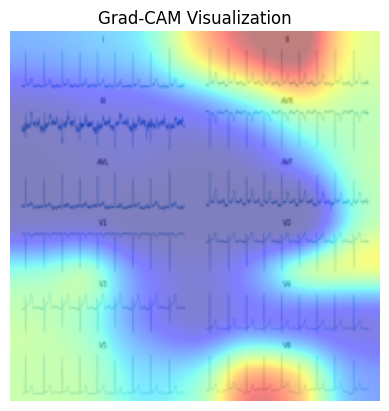

In [23]:
import torch
import timm
from torchvision import transforms
from PIL import Image
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

# 1. Load the model
model = timm.create_model('efficientnet_b0', pretrained=False, num_classes=1)
model.load_state_dict(torch.load('model/efficientNet.pt', map_location='cpu'))
model.eval()

# 2. Pick a target convolution layer
# for name, module in model.named_modules(): # check names of all layers
#     print(name)
cam_extractor = GradCAM(model, target_layer='blocks.6.0.conv_pwl') 

# 3. Load and preprocess image
# image_path = 'data_test/ptbxl_output/03000/03001_hr.png'
image_path = 'data_test/samitrop_output/4991.png'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
input_tensor = transform(Image.open(image_path).convert('RGB')).unsqueeze(0)

# 4. Forward pass
output = model(input_tensor)
class_idx = 0 

prob   = torch.sigmoid(output).item()
pred_idx = 1 if prob >= 0.5 else 0
print(f"Predicted class index: {pred_idx}, Probability: {prob:.4f}")

# 5. Generate CAM
activation_map = cam_extractor(class_idx, output)[0]

# 6. Overlay CAM
result = overlay_mask(to_pil_image(input_tensor.squeeze()), to_pil_image(activation_map, mode='F'), alpha=0.5)

# 7. Show the result
plt.imshow(result)
plt.axis('off')
plt.title('Grad-CAM Visualization')
plt.show()